In [3]:
import pandas as pd
import numpy as np

In [4]:
import pandas as pd
import os

# Directory containing your files
directory = 'C:/Users/omitu/Documents/GitHub/Urbanization-and-Climate-Change/Second_part/data/precip/'

# List to hold data from each file
all_data = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):  # Adjust this if your files have a different format
        file_path = os.path.join(directory, filename)

        # Read the file into a DataFrame
        df = pd.read_csv(file_path)

        # Group by Longitude and Latitude and sum the Precipitation
        grouped_df = df.groupby(['Longitude', 'Latitude']).agg({'Precipitation': 'sum'}).reset_index()

        # Append the processed DataFrame to the list
        all_data.append(grouped_df)

# Combine all data into a single DataFrame
summed_precip = pd.concat(all_data, ignore_index=True)

# Optionally, save the combined data to a new file
#combined_data.to_csv('path/to/save/combined_data.csv', index=False)


In [5]:
summed_precip

,Longitude,Latitude,Precipitation
0,-95.299041,29.865850,262.8750
1,-95.298032,30.075203,255.2500
2,-95.297015,30.284997,185.7500
3,-95.296421,29.066468,260.1250
4,-95.295989,30.495233,111.5000
...,...,...,...
11821,-93.952197,29.581903,247.6875
11822,-93.951280,29.407253,191.0625
11823,-93.951051,30.847220,235.3750
11824,-93.950370,29.232913,155.1250


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Replace the synthetic data below with your own data
longitudes = summed_precip['Longitude']
latitudes = summed_precip['Latitude']
precipitation = summed_precip['Precipitation']

# Creating a regular grid for contour plot
# Adjust the grid size as needed for resolution
grid_size = 20

lon_bins = np.linspace(min(longitudes), max(longitudes), grid_size)
lat_bins = np.linspace(min(latitudes), max(latitudes), grid_size)


# Adjusting the code to focus on calculating the average precipitation distribution

# Creating a grid for averaging
lon_grid, lat_grid = np.meshgrid(lon_bins, lat_bins)
precipitation_grid = np.zeros(lon_grid.shape)
count_grid = np.zeros(lon_grid.shape)

# Accumulating precipitation data in each grid cell
# Accumulating precipitation data in each grid cell
for lon, lat, precip in zip(longitudes, latitudes, precipitation):
    lon_idx = np.searchsorted(lon_bins, lon, side="right") - 1
    lat_idx = np.searchsorted(lat_bins, lat, side="right") - 1

    # Check if the point falls within our defined grid
    if 0 <= lon_idx < grid_size and 0 <= lat_idx < grid_size:
        precipitation_grid[lat_idx, lon_idx] += precip
        count_grid[lat_idx, lon_idx] += 1


# Calculating the average precipitation per grid cell
# Avoid division by zero for cells with no data
with np.errstate(divide='ignore', invalid='ignore'):
    average_precipitation = np.true_divide(precipitation_grid, count_grid)
    average_precipitation[count_grid == 0] = np.nan  # Set cells with no data to NaN



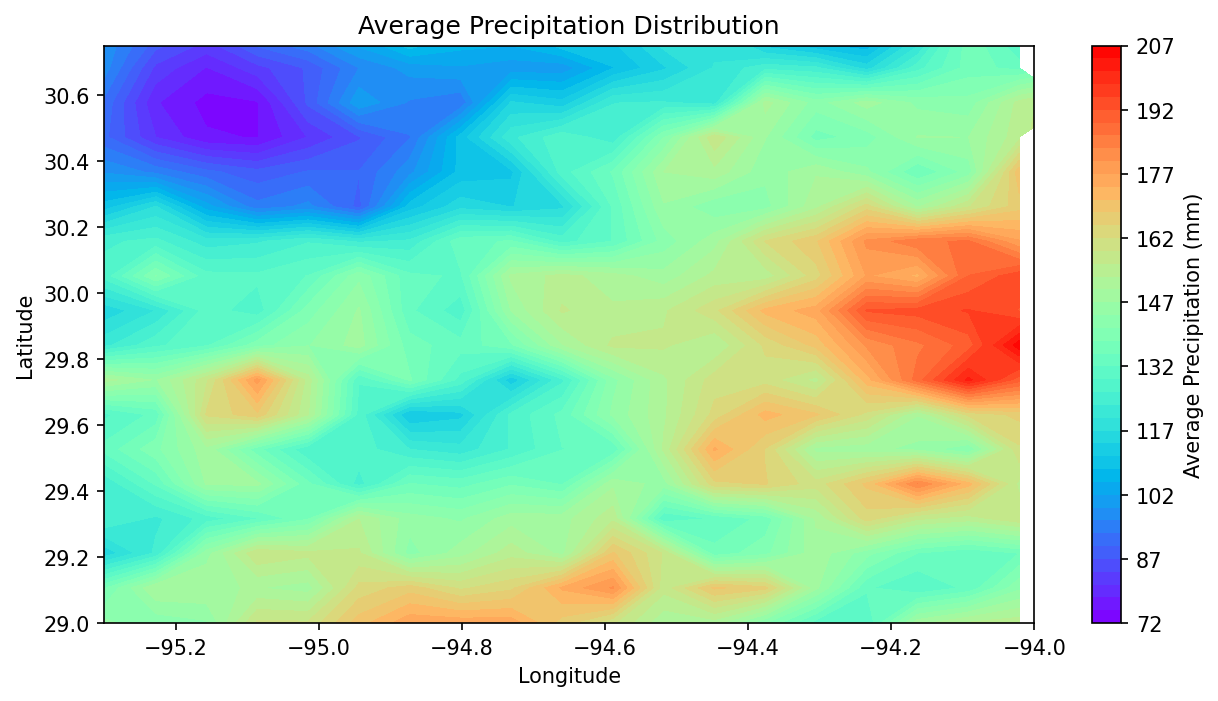

In [8]:
# Plotting the average precipitation distribution
plt.figure(figsize=(10, 5), dpi=150)
plt.contourf(lon_grid, lat_grid, average_precipitation, levels=50, cmap='rainbow')
plt.colorbar(label='Average Precipitation (mm)')
plt.title('Average Precipitation Distribution')
plt.xlabel('Longitude')
plt.xlim(-95.3, -94)
plt.ylim(29, 30.75)
plt.ylabel('Latitude')
plt.show()

In [ ]:
%store summed_precip

Stored 'summed_precip' (DataFrame)
